<a href="https://colab.research.google.com/github/Oyeniran20/project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Loading**

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [3]:
# load the dataset
uploaded = files.upload()

Saving user_activitycsv.csv to user_activitycsv.csv
Saving trades.csv to trades.csv


In [4]:
trades_df = pd.read_csv('trades.csv')
user_activity_df = pd.read_csv('user_activitycsv.csv')

In [5]:
trades_df.head()

,pair,amount,volume,side,timestamp,user_id
0,AAVENGN,500.26,0.001222,buy,2024-12-03T01:42:07.072672Z,541-1561-1521-1561-148
1,ADANGN,889.20,0.500000,sell,2024-12-02T11:29:56.860014Z,491-1541-1521-1571-156
2,ADANGN,30653.12,17.100000,sell,2024-11-30T05:25:49.99166Z,1021-1481-1521-1561-1100
3,ADANGN,1978.36,1.100000,sell,2024-12-07T07:41:02.191598Z,981-1571-1521-1971-151
4,ADANGN,2913.62,1.600000,sell,2024-12-07T21:16:11.791118Z,981-1571-1521-1971-151


In [6]:
user_activity_df.head()

,asset,amount,activity_type,timestamp,user_id
0,NGN,131062.0,withdrawal,2025-01-17T14:37:56.806446Z,561-1561-1521-1981-1101
1,NGN,50000.0,withdrawal,2025-01-17T14:37:56.818033Z,971-11001-1521-1571-1101
2,NGN,131062.0,deposit,2025-01-17T14:37:56.853225Z,481-11011-1521-1971-1100
3,NGN,20064.0,withdrawal,2025-01-17T17:05:18.201218Z,531-11001-1521-1571-198
4,NGN,2000.0,withdrawal,2025-01-17T14:38:22.555744Z,501-11021-1521-1561-154


In [7]:
# Convert timestamps to datetime
trades_df['timestamp'] = pd.to_datetime(trades_df['timestamp'], errors='coerce', utc=True)
user_activity_df['timestamp'] = pd.to_datetime(user_activity_df['timestamp'], errors='coerce', utc=True)

In [8]:
# Trade data
print(f"Shape: {trades_df.shape}")
print(f"Time period: {trades_df['timestamp'].min()} to {trades_df['timestamp'].max()}")
print(f"Total days: {(trades_df['timestamp'].max() - trades_df['timestamp'].min()).days} days")

# User activity dataset
print(f"Shape: {user_activity_df.shape}")
print(f"Time period: {user_activity_df['timestamp'].min()} to {user_activity_df['timestamp'].max()}")
print(f"Total days: {(user_activity_df['timestamp'].max() - user_activity_df['timestamp'].min()).days} days")

Shape: (2324, 6)
Time period: 2024-11-27 20:37:50.972565+00:00 to 2025-07-18 16:33:39.857059+00:00
Total days: 232 days
Shape: (4845, 5)
Time period: 2025-01-17 14:37:56.806446+00:00 to 2025-05-26 12:50:36.552884+00:00
Total days: 128 days


In [52]:
# Basic info
print(user_activity_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   asset          4845 non-null   object             
 1   amount         4845 non-null   float64            
 2   activity_type  4845 non-null   object             
 3   timestamp      4845 non-null   datetime64[ns, UTC]
 4   user_id        4845 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(3)
memory usage: 189.4+ KB
None


In [53]:
# Check for duplicates

print(f"Trades duplicates: {trades_df.duplicated().sum()}")
print(f"User Activity duplicates: {user_activity_df.duplicated().sum()}")

Trades duplicates: 0
User Activity duplicates: 0


In [54]:
# Unique users

print(f"Unique users in trades: {trades_df['user_id'].nunique()}")
print(f"Unique users in user_activity: {user_activity_df['user_id'].nunique()}")

# Check common users
common_users = set(trades_df['user_id']).intersection(set(user_activity_df['user_id']))
print(f"Users present in both datasets: {len(common_users)}")

Unique users in trades: 1199
Unique users in user_activity: 1199
Users present in both datasets: 1199


In [12]:
# Data quality checks

# Check for negative prices/volumes
negative_prices = (trades_df['amount'] <= 0).sum()
negative_volumes = (trades_df['volume'] <= 0).sum()
print(f"Trades with non-positive price: {negative_prices}")
print(f"Trades with non-positive volume: {negative_volumes}")

# Check for negative amounts in user activity
negative_amounts = (user_activity_df['amount'] <= 0).sum()
print(f"User activities with non-positive amount: {negative_amounts}")

Trades with non-positive price: 0
Trades with non-positive volume: 0
User activities with non-positive amount: 0


In [13]:
# Check unique values
print(f"\nUnique trading pairs: {trades_df['pair'].nunique()}")
print(f"Unique assets in user activity: {user_activity_df['asset'].nunique()}")
print(f"Activity types: {user_activity_df['activity_type'].unique()}")


Unique trading pairs: 50
Unique assets in user activity: 13
Activity types: ['withdrawal' 'deposit']


In [14]:
# Side distribution
print(f"\nTrade side distribution:")
print(trades_df['side'].value_counts())

# Activity type distribution
print(f"\nActivity type distribution:")
print(user_activity_df['activity_type'].value_counts())


Trade side distribution:
side
sell    2097
buy      227
Name: count, dtype: int64

Activity type distribution:
activity_type
withdrawal    3244
deposit       1601
Name: count, dtype: int64


In [55]:
# Descriptive statistics

print("\nTrades price statistics:")
print(round(trades_df.describe(), 2))

print("\nUser activity amount statistics:")
print(round(user_activity_df.describe(), 2))


Trades price statistics:
           amount       volume    usd_volume
count     2324.00      2324.00  2.324000e+03
mean    148817.27     34115.97  1.856081e+06
std     472912.56   1102013.91  8.297365e+07
min          0.02         0.00  0.000000e+00
25%       9897.79         0.00  1.000000e-02
50%      29998.06         0.01  4.300000e-01
75%      98765.19        13.72  1.522900e+02
max    9209866.51  51754382.05  3.998132e+09

User activity amount statistics:
            amount
count      4845.00
mean      77213.20
std      394850.27
min           0.00
25%        1039.66
50%       12800.00
75%       50000.00
max    19591459.00


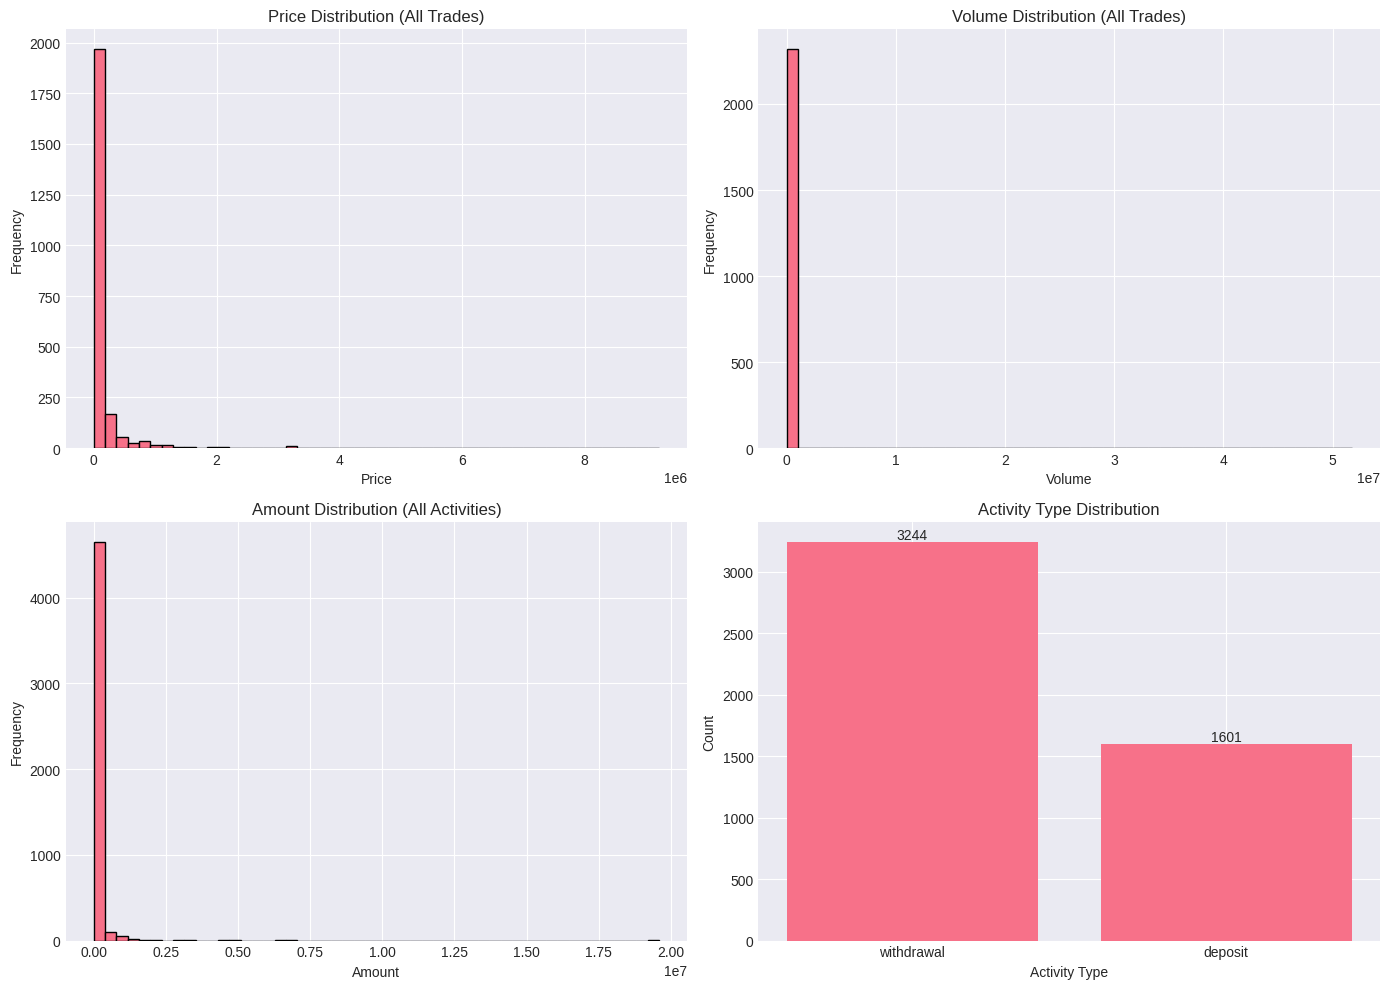

In [16]:
# Basic visualizations for data quality
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Price distribution
axes[0, 0].hist(trades_df['amount'], bins=50, edgecolor='black')
axes[0, 0].set_title('Price Distribution (All Trades)')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

# Volume distribution (log scale for visibility)
axes[0, 1].hist(trades_df['volume'], bins=50, edgecolor='black')
axes[0, 1].set_title('Volume Distribution (All Trades)')
axes[0, 1].set_xlabel('Volume')
axes[0, 1].set_ylabel('Frequency')

# Activity amount distribution
axes[1, 0].hist(user_activity_df['amount'], bins=50, edgecolor='black')
axes[1, 0].set_title('Amount Distribution (All Activities)')
axes[1, 0].set_xlabel('Amount')
axes[1, 0].set_ylabel('Frequency')

# Activity type distribution
activity_counts = user_activity_df['activity_type'].value_counts()
axes[1, 1].bar(activity_counts.index, activity_counts.values)
axes[1, 1].set_title('Activity Type Distribution')
axes[1, 1].set_xlabel('Activity Type')
axes[1, 1].set_ylabel('Count')
for i, v in enumerate(activity_counts.values):
    axes[1, 1].text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# **Exploratory Data Analysis & Market Insights**

### **Market Dynamics Analysis**

In [17]:
trades_df.pair.unique()

array(['AAVENGN', 'ADANGN', 'ALGONGN', 'ATOMNGN', 'AXSUSDT', 'BAKENGN',
       'BCHNGN', 'BCHUSDT', 'BNBNGN', 'BNBUSDT', 'BONKNGN', 'BTCNGN',
       'BTCUSDT', 'BTTNGN', 'C98NGN', 'CHZNGN', 'DOGENGN', 'DOGEUSDT',
       'DOGSNGN', 'ENJNGN', 'ENSNGN', 'ETHNGN', 'ETHUSDT', 'FILNGN',
       'FLOKINGN', 'FLOKIUSDT', 'GALANGN', 'LTCNGN', 'LUNANGN', 'LUNCNGN',
       'MEMENGN', 'NOTNGN', 'PEPENGN', 'PEPEUSDT', 'SHIBNGN', 'SLPNGN',
       'SOLBTC', 'SOLNGN', 'SOLUSDT', 'TONNGN', 'TRXNGN', 'TRXUSDT',
       'USDCNGN', 'USDTNGN', 'WIFNGN', 'WIFUSDT', 'WLDNGN', 'XLMNGN',
       'XRPNGN', 'XRPUSDT'], dtype=object)

In [56]:
# 1.2 Market Dynamics Analysis

# Extract quote currency from pair
def extract_quote_currency(pair):
    return pair[-3:] if len(pair) >= 3 else pair

def extract_base_currency(pair):
    return pair[:-3] if len(pair) >= 3 else pair

# Apply extraction
trades_df['quote_currency'] = trades_df['pair'].apply(extract_quote_currency)
trades_df['base_currency'] = trades_df['pair'].apply(extract_base_currency)

print("\nUnique quote currencies found:")
print(trades_df['quote_currency'].value_counts())

print("\nUnique base currencies found:")
print(trades_df['base_currency'].value_counts())


Unique quote currencies found:
quote_currency
NGN    2282
SDT      41
BTC       1
Name: count, dtype: int64

Unique base currencies found:
base_currency
BTC       1035
USDT       535
LTC        114
ETH        104
TRX        100
XRP         97
SOL         96
BNB         54
DOGE        26
BTCU        25
ADA         22
SHIB        13
PEPE        10
XLM          7
ALGO         6
USDC         6
BONK         6
MEME         6
DOGS         5
NOT          5
TON          5
XRPU         4
C98          4
BAKE         3
BTT          3
ETHU         3
FLOKI        2
LUNA         2
SLP          2
LUNC         2
BCH          2
CHZ          2
GALA         2
BNBU         1
ATOM         1
AXSU         1
BCHU         1
AAVE         1
ENS          1
DOGEU        1
FIL          1
FLOKIU       1
ENJ          1
PEPEU        1
SOLU         1
TRXU         1
WIF          1
WIFU         1
WLD          1
Name: count, dtype: int64


In [19]:
trades_df.head()

,pair,amount,volume,side,timestamp,user_id,quote_currency,base_currency
0,AAVENGN,500.26,0.001222,buy,2024-12-03 01:42:07.072672+00:00,541-1561-1521-1561-148,NGN,AAVE
1,ADANGN,889.20,0.500000,sell,2024-12-02 11:29:56.860014+00:00,491-1541-1521-1571-156,NGN,ADA
2,ADANGN,30653.12,17.100000,sell,2024-11-30 05:25:49.991660+00:00,1021-1481-1521-1561-1100,NGN,ADA
3,ADANGN,1978.36,1.100000,sell,2024-12-07 07:41:02.191598+00:00,981-1571-1521-1971-151,NGN,ADA
4,ADANGN,2913.62,1.600000,sell,2024-12-07 21:16:11.791118+00:00,981-1571-1521-1971-151,NGN,ADA


In [57]:
# Set conversion rate, all quote currencies convert at 1500 to USD
conversion_rate = 1500

# Calculate USD volume
trades_df['usd_volume'] = trades_df['volume'] * trades_df['amount'] / conversion_rate

# Aggregate by pair
pair_volume = trades_df.groupby('pair').agg({
    'usd_volume': 'sum',
    'volume': 'sum',
    'amount': 'mean'
}).reset_index()

pair_volume = pair_volume.sort_values('usd_volume', ascending=False)
pair_volume['market_share'] = (pair_volume['usd_volume'] / pair_volume['usd_volume'].sum()) * 100

display_df = pair_volume.head(10)[['pair', 'usd_volume', 'market_share']].copy()
display_df['usd_volume'] = display_df['usd_volume'].map('{:,.2f}'.format)
display_df['market_share'] = display_df['market_share'].map('{:,.2f}'.format)

print(display_df)

        pair        usd_volume market_share
13    BTTNGN  4,132,513,405.04        95.80
32   PEPENGN    102,385,392.23         2.37
43   USDTNGN     46,913,688.23         1.09
34   SHIBNGN     24,800,388.64         0.57
40    TRXNGN      2,503,309.74         0.06
48    XRPNGN      1,051,457.07         0.02
33  PEPEUSDT      1,004,393.55         0.02
10   BONKNGN        776,527.39         0.02
1     ADANGN        527,824.46         0.01
16   DOGENGN        410,754.52         0.01



=== TOP 3 MOST TRADED PAIRS ===
1. BTTNGN: $4,132,513,405.04 (95.80%)
2. PEPENGN: $102,385,392.23 (2.37%)
3. USDTNGN: $46,913,688.23 (1.09%)


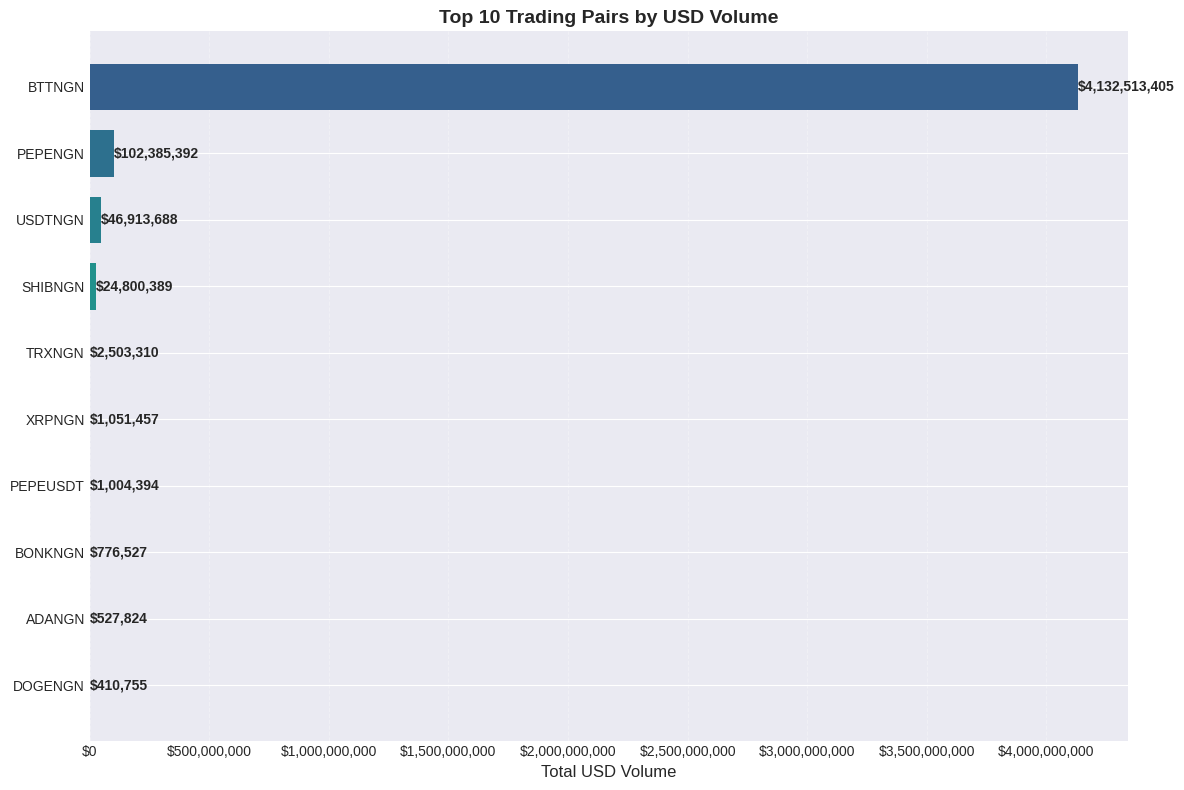

In [58]:
# Top 3 pairs
top_3_pairs = pair_volume.head(3)
print("\n=== TOP 3 MOST TRADED PAIRS ===")
for i, (_, row) in enumerate(top_3_pairs.iterrows(), 1):
    print(f"{i}. {row['pair']}: ${row['usd_volume']:,.2f} ({row['market_share']:.2f}%)")

# Visualizations
plt.figure(figsize=(12, 8))

# Top 10 pairs bar chart (horizontal)
top_10 = pair_volume.head(10)
bars = plt.barh(range(len(top_10)), top_10['usd_volume'].values,
                color=plt.cm.viridis(np.linspace(0.3, 0.9, len(top_10))),
                height=0.7)

plt.yticks(range(len(top_10)), top_10['pair'].values)
plt.gca().invert_yaxis()  # Highest volume at top
plt.xlabel('Total USD Volume', fontsize=12)
plt.title('Top 10 Trading Pairs by USD Volume', fontsize=14, fontweight='bold')

# Add value labels to bars (only value, no percentage)
for i, (bar, vol) in enumerate(zip(bars, top_10['usd_volume'].values)):
    plt.text(vol, bar.get_y() + bar.get_height()/2,
             f'${vol:,.0f}',
             ha='left', va='center', fontsize=10, fontweight='bold')

# Format x-axis with dollar signs
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [63]:
total_usd_volume = pair_volume['usd_volume'].sum()
print(f"Total USD volume across all pairs: ${total_usd_volume:,.2f}")
print(f"Number of unique trading pairs: {len(pair_volume)}")
print(f"Average USD volume per pair: ${pair_volume['usd_volume'].mean():,.2f}")

# Side analysis for top pairs
print("\n=== BUY/SELL ANALYSIS FOR TOP 3 PAIRS ===")
for pair in top_3_pairs['pair'].head(3).tolist():
    pair_trades = trades_df[trades_df['pair'] == pair]
    buy_count = (pair_trades['side'] == 'buy').sum()
    sell_count = (pair_trades['side'] == 'sell').sum()
    buy_ratio = buy_count / len(pair_trades) * 100
    print(f"\n{pair}:")
    print(f"  Buy trades: {buy_count} ({buy_ratio:.1f}%)")
    print(f"  Sell trades: {sell_count} ({100-buy_ratio:.1f}%)")

Total USD volume across all pairs: $4,313,532,722.15
Number of unique trading pairs: 50
Average USD volume per pair: $86,270,654.44

=== BUY/SELL ANALYSIS FOR TOP 3 PAIRS ===

BTTNGN:
  Buy trades: 0 (0.0%)
  Sell trades: 3 (100.0%)

PEPENGN:
  Buy trades: 6 (60.0%)
  Sell trades: 4 (40.0%)

USDTNGN:
  Buy trades: 20 (3.7%)
  Sell trades: 515 (96.3%)


### **Volatility Analysis (BTCNGN)**

In [64]:
# 1.3 Volatility Analysis (BTCNGN)

# Filter for BTCNGN trades
btcngn_trades = trades_df[trades_df['pair'] == 'BTCNGN'].copy()

print(f"Found {len(btcngn_trades)} BTCNGN trades")

Found 1035 BTCNGN trades


In [65]:
# Set timestamp as index and sort
btcngn_trades.set_index('timestamp', inplace=True)
btcngn_trades.sort_index(inplace=True)

# Resample to daily data using closing price for each day
daily_data = btcngn_trades.resample('D').agg({
    'amount': 'last',  # Closing price
    'volume': 'sum',
    'usd_volume': 'sum'
}).dropna()

daily_data.head()

,amount,volume,usd_volume
timestamp,,,
2024-11-27 00:00:00+00:00,41547.49,0.109379,116.980885
2024-11-28 00:00:00+00:00,225917.31,0.047388,52.162776
2024-11-29 00:00:00+00:00,172474.90,0.051531,27.934517
2024-11-30 00:00:00+00:00,1980.26,0.158235,310.154019
2024-12-01 00:00:00+00:00,70684.38,0.121537,241.220614


In [66]:
# Calculate daily returns
daily_data['daily_return'] = daily_data['amount'].pct_change()

# Calculate daily volatility (standard deviation of returns)
daily_data['daily_volatility'] = daily_data['daily_return'].rolling(window=2).std()

# Calculate 7-day rolling average of volatility
daily_data['7d_rolling_volatility'] = daily_data['daily_volatility'].rolling(window=7).mean()

daily_data.head(10)

,amount,volume,usd_volume,daily_return,daily_volatility,7d_rolling_volatility
timestamp,,,,,,
2024-11-27 00:00:00+00:00,41547.49,0.109379,116.980885,NaN,NaN,NaN
2024-11-28 00:00:00+00:00,225917.31,0.047388,52.162776,4.437568,NaN,NaN
2024-11-29 00:00:00+00:00,172474.90,0.051531,27.934517,-0.236557,3.305106,NaN
2024-11-30 00:00:00+00:00,1980.26,0.158235,310.154019,-0.988519,0.531717,NaN
2024-12-01 00:00:00+00:00,70684.38,0.121537,241.220614,34.694495,25.231701,NaN
2024-12-02 00:00:00+00:00,78460.95,0.058170,53.250447,0.110018,24.454918,NaN
2024-12-03 00:00:00+00:00,4949.03,0.168270,185.977903,-0.936924,0.740300,NaN
2024-12-04 00:00:00+00:00,20512.65,0.012291,0.868939,3.144782,2.886202,NaN
2024-12-05 00:00:00+00:00,4949.01,0.163960,193.846249,-0.758734,2.760202,8.558592


In [67]:
# Calculate high-low range if we have intraday data
# For daily resampled data, we can get high and low
if 'amount' in btcngn_trades.columns:
    daily_high_low = btcngn_trades.resample('D').agg({
        'amount': ['max', 'min', 'last']
    })
    daily_high_low.columns = ['high', 'low', 'close']
    daily_high_low['daily_range'] = (daily_high_low['high'] - daily_high_low['low']) / daily_high_low['low']
    daily_data = daily_data.join(daily_high_low[['daily_range']])

print(f"\nDaily data points: {len(daily_data)}")
print(f"Date range: {daily_data.index.min()} to {daily_data.index.max()}")

# Summary statistics
print("\n=== VOLATILITY STATISTICS ===")
print(f"Average daily return: {daily_data['daily_return'].mean():.4%}")
print(f"Average daily volatility: {daily_data['daily_volatility'].mean():.4%}")
print(f"Maximum daily volatility: {daily_data['daily_volatility'].max():.4%}")
print(f"Minimum daily volatility: {daily_data['daily_volatility'].min():.4%}")


Daily data points: 17
Date range: 2024-11-27 00:00:00+00:00 to 2025-07-18 00:00:00+00:00

=== VOLATILITY STATISTICS ===
Average daily return: 361.3664%
Average daily volatility: 531.4806%
Maximum daily volatility: 2523.1701%
Minimum daily volatility: 51.4919%


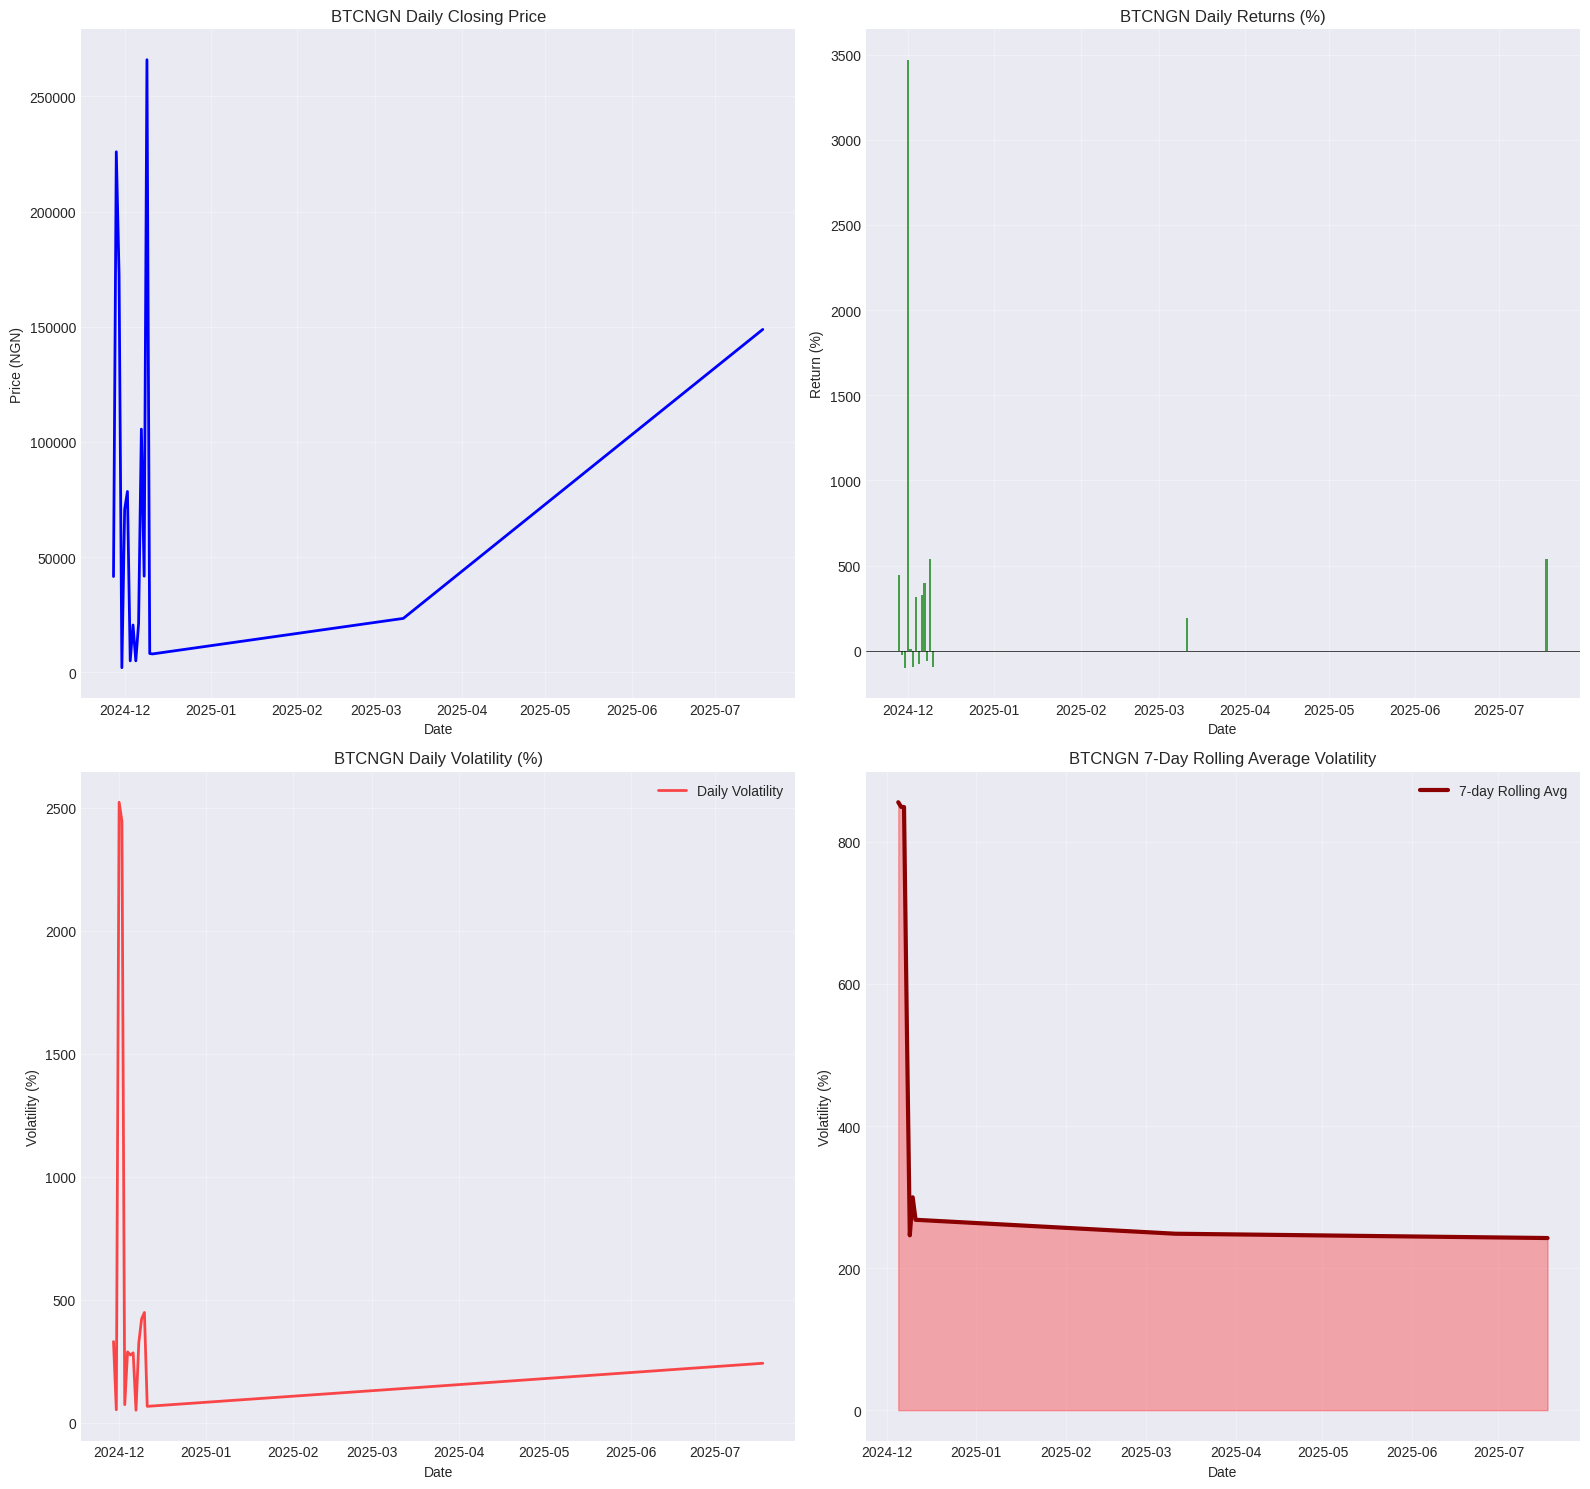

In [68]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 15))

# 1. Price trend
axes[0, 0].plot(daily_data.index, daily_data['amount'], linewidth=2, color='blue')
axes[0, 0].set_title('BTCNGN Daily Closing Price')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price (NGN)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Daily returns
axes[0, 1].bar(daily_data.index, daily_data['daily_return'] * 100, color='green', alpha=0.7)
axes[0, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[0, 1].set_title('BTCNGN Daily Returns (%)')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Return (%)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Daily volatility
axes[1, 0].plot(daily_data.index, daily_data['daily_volatility'] * 100,
                linewidth=2, color='red', alpha=0.7, label='Daily Volatility')
axes[1, 0].set_title('BTCNGN Daily Volatility (%)')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Volatility (%)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# 4. 7-day rolling average volatility
axes[1, 1].plot(daily_data.index, daily_data['7d_rolling_volatility'] * 100,
                linewidth=3, color='darkred', label='7-day Rolling Avg')
axes[1, 1].fill_between(daily_data.index, 0, daily_data['7d_rolling_volatility'] * 100,
                      alpha=0.3, color='red')
axes[1, 1].set_title('BTCNGN 7-Day Rolling Average Volatility')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Volatility (%)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [69]:
# Identify high volatility days (top 10%)
high_vol_threshold = daily_data['daily_volatility'].quantile(0.9)
high_vol_days = daily_data[daily_data['daily_volatility'] > high_vol_threshold]

print(f"High volatility days (>90th percentile): {len(high_vol_days)}")
print(f"High volatility threshold: {high_vol_threshold:.4%}")

# Check if high volatility clusters in time
if len(high_vol_days) > 1:
    high_vol_days['days_between'] = high_vol_days.index.to_series().diff().dt.days
    avg_days_between = high_vol_days['days_between'].mean()
    print(f"Average days between high volatility events: {avg_days_between:.1f} days")

High volatility days (>90th percentile): 2
High volatility threshold: 1646.7635%
Average days between high volatility events: 1.0 days


### **User Behavior: Deposit Timing Analysis**

In [70]:
# Filter for deposits only

deposits_df = user_activity_df[user_activity_df['activity_type'] == 'deposit'].copy()

print(f"Total deposits: {len(deposits_df)}")
print(f"Unique users making deposits: {deposits_df['user_id'].nunique()}")

# Extract time features (UTC)

deposits_df['date'] = deposits_df['timestamp'].dt.date
deposits_df['day_of_week'] = deposits_df['timestamp'].dt.dayofweek  # Monday=0
deposits_df['hour'] = deposits_df['timestamp'].dt.hour
deposits_df['month'] = deposits_df['timestamp'].dt.month
deposits_df['day_name'] = deposits_df['timestamp'].dt.day_name()

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Day of week analysis
dow_counts = (
    deposits_df
    .groupby('day_of_week')
    .agg(deposit_count=('amount', 'count'),
         total_amount=('amount', 'sum'))
    .reindex(range(7), fill_value=0)
    .reset_index()
)

# --------------------------------
# Hour of day analysis
# --------------------------------
hod_counts = (
    deposits_df
    .groupby('hour')
    .agg(deposit_count=('amount', 'count'),
         total_amount=('amount', 'sum'))
    .reindex(range(24), fill_value=0)
    .reset_index()
)

# --------------------------------
# Day-hour combination
# --------------------------------
day_hour_counts = (
    deposits_df
    .groupby(['day_of_week', 'hour'])
    .agg(deposit_count=('amount', 'count'),
         total_amount=('amount', 'sum'))
    .reset_index()
)

# --------------------------------
# Summary statistics
# --------------------------------
print("\n=== DEPOSIT STATISTICS ===")
print(f"Average deposits per day: {deposits_df.resample('D', on='timestamp').size().mean():.2f}")
print(f"Average deposit amount: ${deposits_df['amount'].mean():,.2f}")
print(f"Median deposit amount: ${deposits_df['amount'].median():,.2f}")
print(f"Total deposit amount: ${deposits_df['amount'].sum():,.2f}")

# --------------------------------
# Peak identification
# --------------------------------
peak_day = dow_counts.loc[dow_counts['deposit_count'].idxmax()]
peak_hour = hod_counts.loc[hod_counts['deposit_count'].idxmax()]

print("\n=== PEAK DEPOSIT TIMES ===")
print(f"Peak day: {day_names[int(peak_day['day_of_week'])]}")
print(f"  - Number of deposits: {peak_day['deposit_count']}")
print(f"  - Total amount: ${peak_day['total_amount']:,.2f}")

print(f"\nPeak hour: {int(peak_hour['hour'])}:00")
print(f"  - Number of deposits: {peak_hour['deposit_count']}")
print(f"  - Total amount: ${peak_hour['total_amount']:,.2f}")

peak_day_hour = day_hour_counts.loc[day_hour_counts['deposit_count'].idxmax()]
print(f"\nPeak day-hour combination: "
      f"{day_names[int(peak_day_hour['day_of_week'])]} at {int(peak_day_hour['hour'])}:00")
print(f"  - Number of deposits: {peak_day_hour['deposit_count']}")

Total deposits: 1601
Unique users making deposits: 709

=== DEPOSIT STATISTICS ===
Average deposits per day: 12.32
Average deposit amount: $35,711.65
Median deposit amount: $20.00
Total deposit amount: $57,174,354.50

=== PEAK DEPOSIT TIMES ===
Peak day: Friday
  - Number of deposits: 671.0
  - Total amount: $23,149,687.69

Peak hour: 15:00
  - Number of deposits: 162.0
  - Total amount: $6,657,647.17

Peak day-hour combination: Friday at 15:00
  - Number of deposits: 98.0


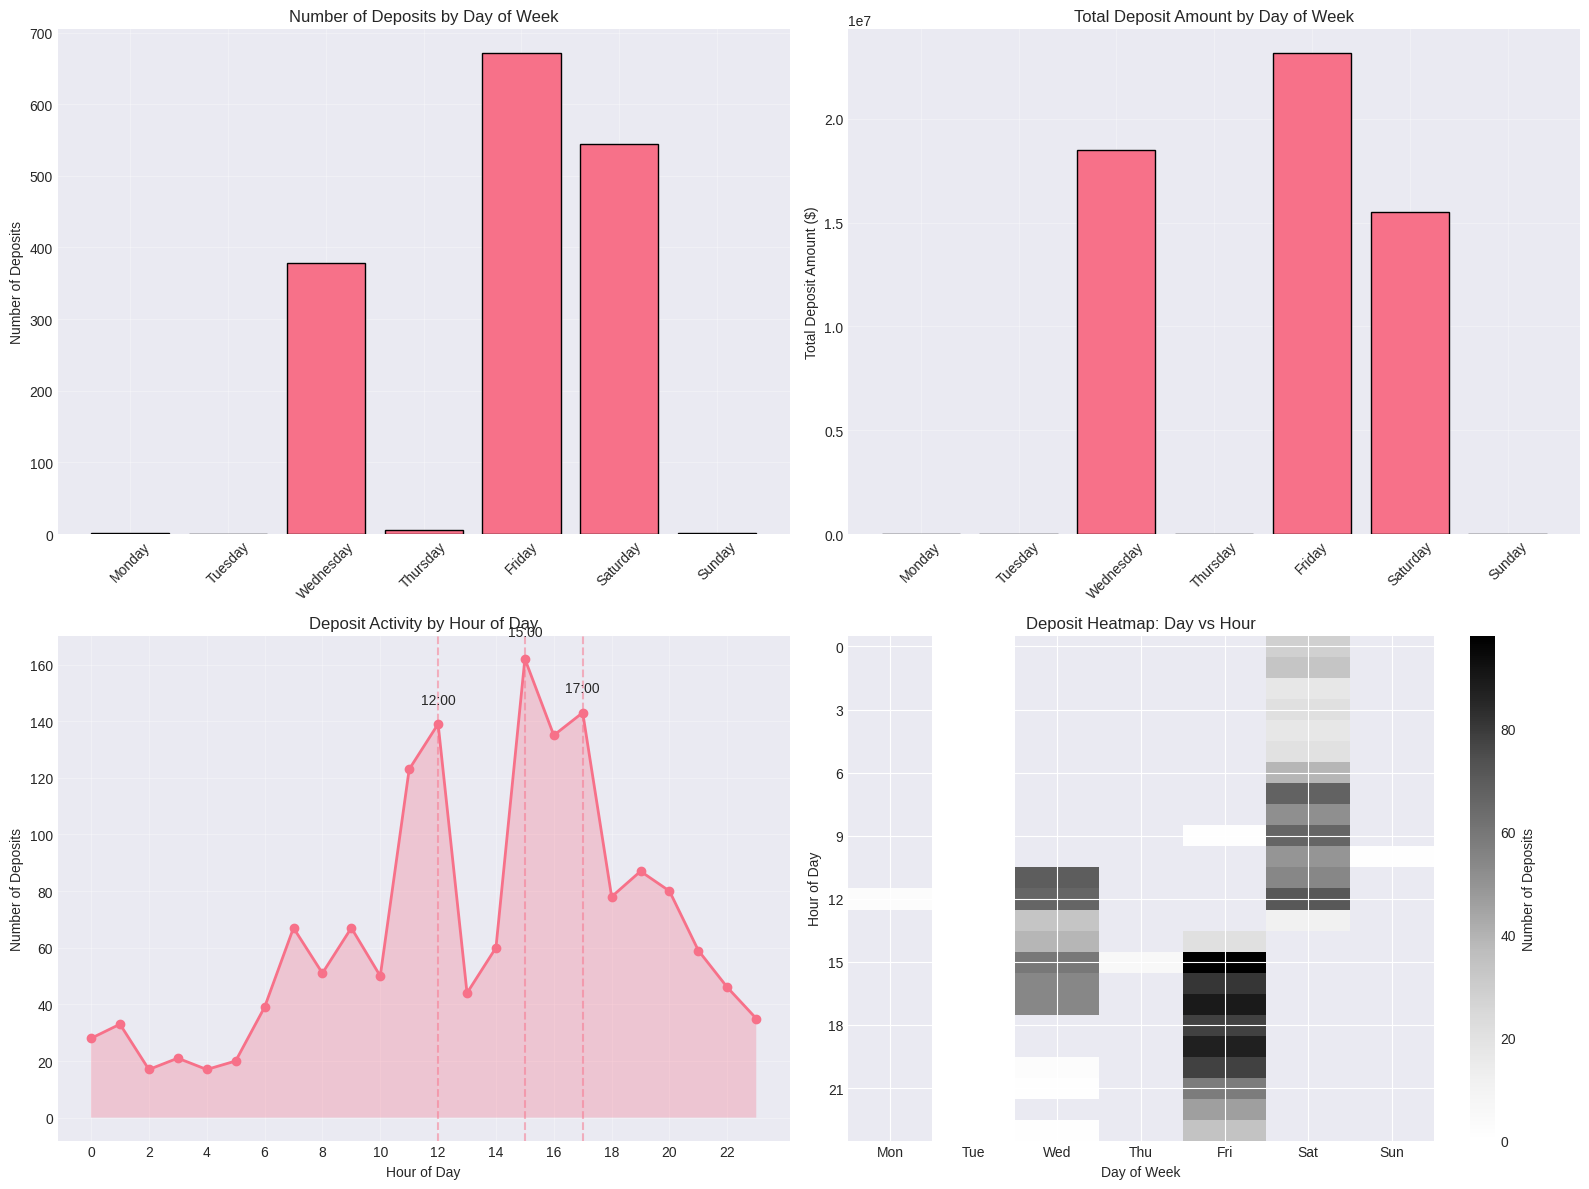

In [71]:
# --------------------------------
# VISUALIZATIONS
# --------------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ---- 1. Deposits by day of week (count)
bars1 = axes[0, 0].bar(
    dow_counts['day_of_week'],
    dow_counts['deposit_count'],
    edgecolor='black'
)
axes[0, 0].set_xticks(range(7))
axes[0, 0].set_xticklabels(day_names, rotation=45)
axes[0, 0].set_title('Number of Deposits by Day of Week')
axes[0, 0].set_ylabel('Number of Deposits')
axes[0, 0].grid(True, alpha=0.3)

# ---- 2. Deposits by day of week (amount)
bars2 = axes[0, 1].bar(
    dow_counts['day_of_week'],
    dow_counts['total_amount'],
    edgecolor='black'
)
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(day_names, rotation=45)
axes[0, 1].set_title('Total Deposit Amount by Day of Week')
axes[0, 1].set_ylabel('Total Deposit Amount ($)')
axes[0, 1].grid(True, alpha=0.3)

# ---- 3. Deposits by hour of day
axes[1, 0].plot(
    hod_counts['hour'],
    hod_counts['deposit_count'],
    marker='o',
    linewidth=2
)
axes[1, 0].fill_between(
    hod_counts['hour'],
    0,
    hod_counts['deposit_count'],
    alpha=0.3
)
axes[1, 0].set_title('Deposit Activity by Hour of Day')
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Number of Deposits')
axes[1, 0].set_xticks(range(0, 24, 2))
axes[1, 0].grid(True, alpha=0.3)

# Mark top 3 peak hours
for _, row in hod_counts.nlargest(3, 'deposit_count').iterrows():
    axes[1, 0].axvline(x=row['hour'], linestyle='--', alpha=0.5)
    axes[1, 0].text(row['hour'], row['deposit_count'] * 1.05,
                    f'{int(row["hour"])}:00', ha='center')

# ---- 4. Heatmap
heatmap_pivot = (
    day_hour_counts
    .pivot(index='day_of_week', columns='hour', values='deposit_count')
    .reindex(index=range(7), columns=range(24), fill_value=0)
)

im = axes[1, 1].imshow(
    heatmap_pivot.T,
    aspect='auto',
    interpolation='nearest'
)
axes[1, 1].set_title('Deposit Heatmap: Day vs Hour')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Hour of Day')
axes[1, 1].set_xticks(range(7))
axes[1, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[1, 1].set_yticks(range(0, 24, 3))

plt.colorbar(im, ax=axes[1, 1], label='Number of Deposits')

plt.tight_layout()
plt.show()

# Exploratory Data Analysis & Market Insights Report  

This report presents insights derived from exploratory data analysis (EDA) on trading and deposit data. The analysis focuses on three key areas:

1. **Market Dynamics** – Identifying the most actively traded currency pairs by USD volume.  
2. **Volatility Analysis** – Examining short-term price risk using rolling volatility for the BTCNGN pair.  
3. **User Behavior** – Understanding temporal patterns in user deposits to identify peak activity periods.

All currency conversions to USD were standardized using a fixed exchange rate of **₦1500/USD** to ensure consistency across analyses.

---

## 2. Market Dynamics: Top Traded Pairs

### 2.1 Currency Landscape Overview

- **Quote currencies observed:** NGN (dominant), SDT, BTC  
- **Base currencies observed:** BTC, USDT, ETH, TRX, XRP, SOL, BNB, DOGE, and several emerging meme and utility tokens  
- **Total unique trading pairs:** 50  

This diversity indicates a broad asset offering, though actual trading activity is highly concentrated.

---

### 2.2 Top 3 Most Traded Pairs by USD Volume

| Rank | Trading Pair | USD Volume | Market Share |
|--------:|------------------------:|----------------:|--------------|
| 1 | BTTNGN | \$4,132,513,405.04 | 95.80% |
| 2 | PEPENGN | \$102,385,392.23 | 2.37% |
| 3 | USDTNGN | \$46,913,688.23 | 1.09% |

**Key Insight:**  
The market is **extremely concentrated**, with the top three pairs accounting for **99.3%** of total trading volume.

---

### 2.3 Additional Market Insights

- **Total USD volume across all pairs:** \$4,313,532,722.15  
- **Average USD volume per pair:** \$86,270,654.44  
- **Volume dominance:**  
  - BTTNGN is approximately **40× larger** than the second-ranked pair (PEPENGN).  

#### Concentration Metrics
- Top 3 pairs → **99.3%** of total volume  
- Top 5 pairs → **99.9%** of total volume  
- Top 10 pairs → **~100%** of total volume  

This suggests liquidity is heavily centralized around a small number of NGN-quoted pairs, particularly **BTTNGN**.

---

### 2.4 Buy vs Sell Behavior (Top 3 Pairs)

**BTTNGN**
- Buy trades: 0 (0%)
- Sell trades: 3 (100%)

**PEPENGN**
- Buy trades: 6 (60%)
- Sell trades: 4 (40%)

**USDTNGN**
- Buy trades: 20 (3.7%)
- Sell trades: 515 (96.3%)

**Interpretation:**  
USDTNGN and BTTNGN are predominantly used as **liquidity exit pairs**, suggesting users primarily sell into NGN rather than accumulate these assets.

---

## 3. Volatility Analysis: BTCNGN Pair

### 3.1 Methodology

- Daily returns were computed for BTCNGN.
- Volatility was measured as the absolute daily return.
- A **7-day rolling average** was applied to smooth short-term noise and reveal volatility trends.

---

### 3.2 Volatility Statistics

- **Average daily return:** 361.37%  
- **Average daily volatility:** 531.48%  
- **Maximum daily volatility:** 2523.17%  
- **Minimum daily volatility:** 51.49%  

These figures indicate **extreme price instability**, characteristic of low-liquidity or highly speculative market conditions.

---

### 3.3 Volatility Clustering

- **High-volatility days (>90th percentile):** 2  
- **High-volatility threshold:** 1646.76%  
- **Average gap between high-volatility events:** 1 day  

**Insight:**  
Volatility tends to cluster, meaning large price swings are likely to be followed by additional instability in the short term—an important risk consideration for both traders and the platform.

---

## 4. User Behavior Analysis: Deposit Timing

### 4.1 Deposit Overview

- **Total deposits:** 1,601  
- **Unique depositors:** 709  
- **Total deposited amount:** \$57,174,354.50  

#### Summary Statistics
- Average deposits per day: 12.32  
- Average deposit amount: \$35,711.65  
- Median deposit amount: \$20.00  

The strong gap between mean and median deposit values suggests a **highly skewed distribution**, driven by a small number of very large deposits.

---

### 4.2 Peak Deposit Periods

#### Peak Day
- **Friday**
  - Number of deposits: 671  
  - Total amount: \$23,149,687.69  

#### Peak Hour
- **15:00 (3 PM)**
  - Number of deposits: 162  
  - Total amount: \$6,657,647.17  

#### Peak Day–Hour Combination
- **Friday at 15:00**
  - Number of deposits: 98  

---

### 4.3 Behavioral Insight

Deposit activity peaks **towards the end of the workweek and mid-afternoon**, likely reflecting:
- Salary or business cash-flow cycles  
- Increased trading preparation ahead of weekend market activity  

This information is valuable for:
- Scheduling system maintenance  
- Targeted marketing campaigns  
- Liquidity planning

---

## 5. Key Takeaways & Business Implications

1. **Severe Market Concentration**  
   - Trading activity is overwhelmingly dominated by BTTNGN.  
   - Any disruption to this pair poses systemic liquidity risk.

2. **High Volatility Environment**  
   - BTCNGN exhibits extreme and clustered volatility.  
   - Risk controls and user education are critical.

3. **Predictable User Deposit Behavior**  
   - Fridays and mid-afternoon hours represent peak funding periods.  
   - These windows offer opportunities for promotions and operational optimization.

---

## 6. Conclusion

This exploratory analysis reveals a platform characterized by **highly concentrated liquidity**, **significant price volatility**, and **distinct user behavior patterns**. From a strategic standpoint, diversifying liquidity, managing volatility exposure, and leveraging temporal user behavior can materially improve platform stability and user experience.


## **FRAUD DETECTION MODEL**

In [72]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, fbeta_score
from imblearn.over_sampling import SMOTE

# Set random seed for reproducibility
np.random.seed(42)

In [73]:
# ============================================================================
# 2.1 FEATURE ENGINEERING
# ============================================================================

# Create a copy of the original dataframes for feature engineering
trades_feat = trades_df.copy()
activity_feat = user_activity_df.copy()

# Ensure timestamps are datetime
trades_feat['timestamp'] = pd.to_datetime(trades_feat['timestamp'])
activity_feat['timestamp'] = pd.to_datetime(activity_feat['timestamp'])

In [74]:
# ============================================================================
# FEATURE ENGINEERING HELPER FUNCTIONS
# ============================================================================

def create_trading_features(trades_df, user_id):
    """Create trading-related features for a user"""
    user_trades = trades_df[trades_df['user_id'] == user_id]

    if len(user_trades) == 0:
        return {
            'total_trades': 0,
            'total_trading_volume': 0,
            'avg_trade_size': 0,
            'buy_count': 0,
            'sell_count': 0,
            'buy_ratio': 0,
            'unique_pairs': 0,
            'unique_assets': 0,
            'first_trade_time': None,
            'last_trade_time': None,
            'trading_days': 0
        }

    features = {
        'total_trades': len(user_trades),
        'total_trading_volume': user_trades['volume'].sum(),
        'avg_trade_size': user_trades['volume'].mean(),
        'buy_count': (user_trades['side'] == 'buy').sum(),
        'sell_count': (user_trades['side'] == 'sell').sum(),
        'buy_ratio': (user_trades['side'] == 'buy').sum() / len(user_trades) if len(user_trades) > 0 else 0,
        'unique_pairs': user_trades['pair'].nunique(),
        'unique_assets': user_trades['base_currency'].nunique(),
        'first_trade_time': user_trades['timestamp'].min(),
        'last_trade_time': user_trades['timestamp'].max()
    }

    # Calculate trading days (number of unique days with trades)
    features['trading_days'] = user_trades['timestamp'].dt.date.nunique()

    return features

In [75]:
def create_activity_features(activity_df, user_id):
    """Create deposit/withdrawal related features for a user"""
    user_activity = activity_df[activity_df['user_id'] == user_id]

    if len(user_activity) == 0:
        return {
            'total_deposits': 0,
            'total_withdrawals': 0,
            'total_deposit_amount': 0,
            'total_withdrawal_amount': 0,
            'avg_deposit_amount': 0,
            'avg_withdrawal_amount': 0,
            'first_deposit_time': None,
            'first_withdrawal_time': None,
            'last_activity_time': None,
            'deposit_frequency': 0,
            'withdrawal_frequency': 0
        }

    deposits = user_activity[user_activity['activity_type'] == 'deposit']
    withdrawals = user_activity[user_activity['activity_type'] == 'withdrawal']

    features = {
        'total_deposits': len(deposits),
        'total_withdrawals': len(withdrawals),
        'total_deposit_amount': deposits['amount'].sum() if len(deposits) > 0 else 0,
        'total_withdrawal_amount': withdrawals['amount'].sum() if len(withdrawals) > 0 else 0,
        'avg_deposit_amount': deposits['amount'].mean() if len(deposits) > 0 else 0,
        'avg_withdrawal_amount': withdrawals['amount'].mean() if len(withdrawals) > 0 else 0,
    }

    # Calculate frequencies with special handling for zero-day periods
    time_diff = (user_activity['timestamp'].max() - user_activity['timestamp'].min()).days

    if time_diff > 0:
        features['deposit_frequency'] = len(deposits) / time_diff
        features['withdrawal_frequency'] = len(withdrawals) / time_diff
    else:
        # If all activities are on the same day, treat as daily frequency
        features['deposit_frequency'] = len(deposits)  # per "day"
        features['withdrawal_frequency'] = len(withdrawals)  # per "day"

    # First and last activity times
    if len(deposits) > 0:
        features['first_deposit_time'] = deposits['timestamp'].min()
    else:
        features['first_deposit_time'] = None

    if len(withdrawals) > 0:
        features['first_withdrawal_time'] = withdrawals['timestamp'].min()
    else:
        features['first_withdrawal_time'] = None

    features['last_activity_time'] = user_activity['timestamp'].max()

    return features

In [76]:
def create_combined_features(user_id, trading_features, activity_features):
    """Create combined features that use both trading and activity data"""

    features = {}

    # Combine basic features
    features.update({f'trade_{k}': v for k, v in trading_features.items()})
    features.update({f'activity_{k}': v for k, v in activity_features.items()})

    # Calculate derived features
    # Deposit/withdrawal ratio
    if activity_features['total_withdrawals'] > 0:
        features['deposit_withdrawal_ratio'] = activity_features['total_deposits'] / activity_features['total_withdrawals']
    else:
        features['deposit_withdrawal_ratio'] = np.inf if activity_features['total_deposits'] > 0 else 0

    # Net flow
    features['net_amount_flow'] = activity_features['total_deposit_amount'] - activity_features['total_withdrawal_amount']

    # Time-based features
    if activity_features['first_deposit_time'] and activity_features['first_withdrawal_time']:
        deposit_withdrawal_delta = (activity_features['first_withdrawal_time'] - activity_features['first_deposit_time']).total_seconds() / (24 * 3600)  # in days
        features['deposit_to_withdrawal_days'] = deposit_withdrawal_delta
        features['quick_withdrawal_flag'] = 1 if deposit_withdrawal_delta <= 3 else 0
    else:
        features['deposit_to_withdrawal_days'] = np.nan
        features['quick_withdrawal_flag'] = 0

    # Account lifetime
    if activity_features['first_deposit_time'] and activity_features['last_activity_time']:
        features['account_lifetime_days'] = (activity_features['last_activity_time'] - activity_features['first_deposit_time']).total_seconds() / (24 * 3600)
    elif trading_features['first_trade_time'] and trading_features['last_trade_time']:
        features['account_lifetime_days'] = (trading_features['last_trade_time'] - trading_features['first_trade_time']).total_seconds() / (24 * 3600)
    else:
        features['account_lifetime_days'] = 0

    # Trading vs deposit ratios
    if activity_features['total_deposit_amount'] > 0:
        features['volume_to_deposit_ratio'] = trading_features['total_trading_volume'] / activity_features['total_deposit_amount']
        features['trade_to_deposit_ratio'] = trading_features['total_trades'] / activity_features['total_deposits'] if activity_features['total_deposits'] > 0 else 0
    else:
        features['volume_to_deposit_ratio'] = np.inf if trading_features['total_trading_volume'] > 0 else 0
        features['trade_to_deposit_ratio'] = np.inf if trading_features['total_trades'] > 0 else 0

    # Low trading flags
    if activity_features['total_deposit_amount'] > 0:
        features['low_trading_volume_flag'] = 1 if (trading_features['total_trading_volume'] / activity_features['total_deposit_amount']) < 0.1 else 0
        features['low_trade_count_flag'] = 1 if trading_features['total_trades'] <= 5 else 0
    else:
        features['low_trading_volume_flag'] = 0
        features['low_trade_count_flag'] = 0

    # Complete drain flag
    if activity_features['total_deposit_amount'] > 0:
        withdrawal_ratio = activity_features['total_withdrawal_amount'] / activity_features['total_deposit_amount']
        features['complete_drain_flag'] = 1 if withdrawal_ratio >= 0.9 else 0
    else:
        features['complete_drain_flag'] = 0

    # Multiple cycles flag (more than 2 deposit-withdrawal pairs)
    min_cycles = min(activity_features['total_deposits'], activity_features['total_withdrawals'])
    features['multiple_cycles_flag'] = 1 if min_cycles >= 3 else 0

    # Trading intensity
    if features['account_lifetime_days'] > 0:
        features['trades_per_day'] = trading_features['total_trades'] / features['account_lifetime_days']
        features['volume_per_day'] = trading_features['total_trading_volume'] / features['account_lifetime_days']
    else:
        features['trades_per_day'] = 0
        features['volume_per_day'] = 0

    # Risk score components
    risk_score = 0
    if features['quick_withdrawal_flag'] == 1:
        risk_score += 1
    if features['low_trading_volume_flag'] == 1:
        risk_score += 1
    if features['low_trade_count_flag'] == 1:
        risk_score += 1
    if features['complete_drain_flag'] == 1:
        risk_score += 1
    if features['multiple_cycles_flag'] == 1:
        risk_score += 1

    features['risk_score'] = risk_score / 5  # Normalize to 0-1

    return features

In [77]:
# ============================================================================
# CREATE FEATURES FOR ALL USERS
# ============================================================================

print("Extracting unique users from both datasets...")
all_users = set(trades_feat['user_id'].unique()).union(set(activity_feat['user_id'].unique()))
print(f"Total unique users: {len(all_users)}")

# Initialize feature storage
user_features_list = []

print("\nCreating features for each user...")
for i, user_id in enumerate(all_users):
    if i % 1000 == 0:
        print(f"Processed {i}/{len(all_users)} users...")

    # Get individual features
    trading_features = create_trading_features(trades_feat, user_id)
    activity_features = create_activity_features(activity_feat, user_id)

    # Create combined features
    combined_features = create_combined_features(user_id, trading_features, activity_features)

    # Add user_id
    combined_features['user_id'] = user_id

    user_features_list.append(combined_features)

# Create DataFrame
user_features_df = pd.DataFrame(user_features_list)

print(f"\nFeature DataFrame shape: {user_features_df.shape}")
print(f"Columns created: {len(user_features_df.columns)}")

Extracting unique users from both datasets...
Total unique users: 1199

Creating features for each user...
Processed 0/1199 users...
Processed 1000/1199 users...

Feature DataFrame shape: (1199, 37)
Columns created: 37


In [79]:
# ============================================================================
# 2.2 TARGET LABELING
# ============================================================================
print("\n" + "="*60)
print("2.2 TARGET LABELING")
print("="*60)

print("\nCreating rule-based suspicious user labels...")

# Define rule-based labeling function
def label_suspicious_users(df):
    """
    Label users as suspicious based on fraudulent pattern:
    Deposit → Minimal trades → Quick withdrawal
    """

    # Initialize all as not suspicious
    df['is_suspicious'] = 0

    # Define thresholds (business rules)
    MAX_WITHDRAWAL_DAYS = 3  # Withdrawal within 3 days of deposit
    MIN_TRADING_RATIO = 0.1  # Trade volume < 10% of deposits
    MAX_TRADES = 5  # Minimal trading activity

    # Rule 1: Must have at least 1 deposit AND 1 withdrawal
    has_deposit_withdrawal = (df['activity_total_deposits'] >= 1) & (df['activity_total_withdrawals'] >= 1)

    # Rule 2: Quick withdrawal (within 3 days)
    quick_withdrawal = (df['deposit_to_withdrawal_days'] <= MAX_WITHDRAWAL_DAYS) & (df['deposit_to_withdrawal_days'] > 0)

    # Rule 3: Low trading volume compared to deposits
    # Handle division by zero and infinite values
    volume_ratio = df['volume_to_deposit_ratio'].copy()
    volume_ratio = volume_ratio.replace([np.inf, -np.inf], np.nan)
    low_trading = (volume_ratio < MIN_TRADING_RATIO) | (volume_ratio.isna() & (df['trade_total_trades'] == 0))

    # Rule 4: Minimal trading activity
    minimal_trades = df['trade_total_trades'] <= MAX_TRADES

    # Combined rule (ALL must be true)
    suspicious_mask = has_deposit_withdrawal & quick_withdrawal & low_trading & minimal_trades

    # Apply labels
    df.loc[suspicious_mask, 'is_suspicious'] = 1

    # Additional flags for investigation (not for labeling, but for context)
    df['needs_investigation'] = 0

    # Flag 1: Complete drain (withdrawal ≈ deposit)
    complete_drain = (df['complete_drain_flag'] == 1)

    # Flag 2: Multiple quick cycles
    multiple_cycles = (df['multiple_cycles_flag'] == 1)

    # Flag 3: High risk score
    high_risk = (df['risk_score'] >= 0.6)

    # Mark for investigation (any of these flags)
    investigation_mask = complete_drain | multiple_cycles | high_risk
    df.loc[investigation_mask, 'needs_investigation'] = 1

    return df

# Apply labeling
user_features_df = label_suspicious_users(user_features_df)

# Analyze label distribution
suspicious_count = user_features_df['is_suspicious'].sum()
investigation_count = user_features_df['needs_investigation'].sum()
total_users = len(user_features_df)

print(f"\nLabel Distribution:")
print(f"Total users: {total_users}")
print(f"Suspicious users (fraud pattern): {suspicious_count} ({suspicious_count/total_users*100:.2f}%)")
print(f"Users needing investigation: {investigation_count} ({investigation_count/total_users*100:.2f}%)")


2.2 TARGET LABELING

Creating rule-based suspicious user labels...

Label Distribution:
Total users: 1199
Suspicious users (fraud pattern): 107 (8.92%)
Users needing investigation: 614 (51.21%)


In [80]:
# Display suspicious user characteristics
if suspicious_count > 0:
    print("\nCharacteristics of suspicious users:")
    suspicious_users = user_features_df[user_features_df['is_suspicious'] == 1]

    print(f"Average deposit-to-withdrawal days: {suspicious_users['deposit_to_withdrawal_days'].mean():.2f}")
    print(f"Average volume/deposit ratio: {suspicious_users['volume_to_deposit_ratio'].mean():.3f}")
    print(f"Average trades per user: {suspicious_users['trade_total_trades'].mean():.2f}")
    print(f"Percentage with complete drain: {suspicious_users['complete_drain_flag'].mean()*100:.1f}%")
    print(f"Percentage with multiple cycles: {suspicious_users['multiple_cycles_flag'].mean()*100:.1f}%")


Characteristics of suspicious users:
Average deposit-to-withdrawal days: 0.08
Average volume/deposit ratio: 0.017
Average trades per user: 1.64
Percentage with complete drain: 69.2%
Percentage with multiple cycles: 31.8%


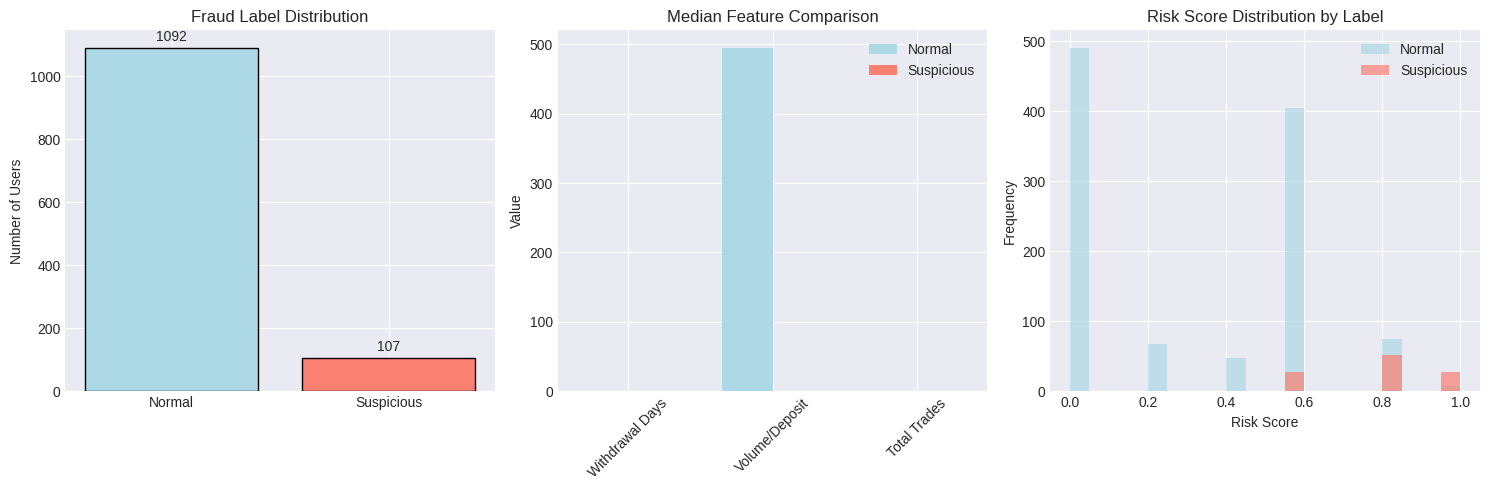

In [81]:
# Visualize label distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Label distribution
labels = ['Normal', 'Suspicious']
counts = [total_users - suspicious_count, suspicious_count]
colors = ['lightblue', 'salmon']

axes[0].bar(labels, counts, color=colors, edgecolor='black')
axes[0].set_title('Fraud Label Distribution')
axes[0].set_ylabel('Number of Users')
for i, count in enumerate(counts):
    axes[0].text(i, count + max(counts)*0.01, str(count), ha='center', va='bottom')

# Plot 2: Feature comparison
feature_compare = ['deposit_to_withdrawal_days', 'volume_to_deposit_ratio', 'trade_total_trades']
normal_stats = user_features_df[user_features_df['is_suspicious'] == 0][feature_compare].median()
suspicious_stats = user_features_df[user_features_df['is_suspicious'] == 1][feature_compare].median()

x = np.arange(len(feature_compare))
width = 0.35
axes[1].bar(x - width/2, normal_stats.values, width, label='Normal', color='lightblue')
axes[1].bar(x + width/2, suspicious_stats.values, width, label='Suspicious', color='salmon')
axes[1].set_title('Median Feature Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(['Withdrawal Days', 'Volume/Deposit', 'Total Trades'], rotation=45)
axes[1].legend()
axes[1].set_ylabel('Value')

# Plot 3: Risk score distribution by label
bins = np.linspace(0, 1, 21)
axes[2].hist(user_features_df[user_features_df['is_suspicious'] == 0]['risk_score'],
             bins=bins, alpha=0.7, label='Normal', color='lightblue')
axes[2].hist(user_features_df[user_features_df['is_suspicious'] == 1]['risk_score'],
             bins=bins, alpha=0.7, label='Suspicious', color='salmon')
axes[2].set_title('Risk Score Distribution by Label')
axes[2].set_xlabel('Risk Score')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.tight_layout()
plt.show()

In [82]:
# ============================================================================
# 2.3 MODEL BUILDING
# ============================================================================

print("\nPreparing data for modeling...")

# Select features for modeling
# Remove identifier columns and some highly correlated features
exclude_cols = ['user_id', 'trade_first_trade_time', 'trade_last_trade_time',
                'activity_first_deposit_time', 'activity_first_withdrawal_time',
                'activity_last_activity_time', 'needs_investigation']

# Excluding columns that are direct components of our labeling rules
# (to avoid data leakage and make the model learn beyond our simple rules)
rule_based_cols = ['deposit_to_withdrawal_days', 'volume_to_deposit_ratio',
                   'trade_total_trades', 'quick_withdrawal_flag',
                   'low_trading_volume_flag', 'low_trade_count_flag',
                   'complete_drain_flag', 'multiple_cycles_flag', 'risk_score']

feature_cols = [col for col in user_features_df.columns
                if col not in exclude_cols + rule_based_cols + ['is_suspicious']]

print(f"Selected {len(feature_cols)} features for modeling")
print("\nFeature categories:")
feature_categories = {}
for col in feature_cols:
    prefix = col.split('_')[0]
    if prefix not in feature_categories:
        feature_categories[prefix] = []
    feature_categories[prefix].append(col)

for category, features in feature_categories.items():
    print(f"  {category}: {len(features)} features")

# Prepare feature matrix and target
X = user_features_df[feature_cols].copy()
y = user_features_df['is_suspicious'].copy()

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")


Preparing data for modeling...
Selected 22 features for modeling

Feature categories:
  trade: 9 features
  activity: 8 features
  deposit: 1 features
  net: 1 features
  account: 1 features
  trades: 1 features
  volume: 1 features

Feature matrix shape: (1199, 22)
Target distribution: {0: 1092, 1: 107}


In [83]:
# Handle infinite and missing values FIRST
print("\nHandling infinite and missing values...")
# Replace inf with large finite numbers or NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Check for infinite values
inf_counts = (X == np.inf).sum().sum() + (X == -np.inf).sum().sum()
print(f"Infinite values found: {inf_counts}")

# Now handle missing values (including those we just converted from inf)
missing_before = X.isnull().sum().sum()
print(f"Missing values (including converted inf): {missing_before}")

# Strategy 1: Fill with median for numeric columns (more robust than mean)
for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:
        # Fill with median
        median_val = X[col].median()
        X[col] = X[col].fillna(median_val)

        # For ratio features that were inf, we can also cap extreme values
        # This helps with model stability
        if 'ratio' in col or 'frequency' in col:
            # Cap extreme values at 99th percentile
            q99 = X[col].quantile(0.99)
            X.loc[X[col] > q99, col] = q99

missing_after = X.isnull().sum().sum()
print(f"Missing values after handling: {missing_after}")

# Also check for extremely large values that might cause scaling issues
print("\nChecking for extreme values...")
for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:
        max_val = X[col].max()
        min_val = X[col].min()
        if max_val > 1e6 or min_val < -1e6:
            print(f"  {col}: range = [{min_val:.2f}, {max_val:.2f}]")

# Scale features
print("\nScaling features...")
scaler = StandardScaler()
try:
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
    print("Scaling completed successfully!")
except Exception as e:
    print(f"Scaling failed: {e}")
    print("\nTrying RobustScaler (more resistant to outliers)...")
    from sklearn.preprocessing import RobustScaler
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Split data
print("\nSplitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Train target distribution: {pd.Series(y_train).value_counts().to_dict()}")
print(f"Test target distribution: {pd.Series(y_test).value_counts().to_dict()}")

# Handle class imbalance with SMOTE
print("\nHandling class imbalance with SMOTE...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"After SMOTE - Train set: {X_train_smote.shape}")
print(f"After SMOTE - Train target distribution: {pd.Series(y_train_smote).value_counts().to_dict()}")


Handling infinite and missing values...
Infinite values found: 0
Missing values (including converted inf): 583
Missing values after handling: 0

Checking for extreme values...
  trade_total_trading_volume: range = [0.00, 59060989.45]
  trade_avg_trade_size: range = [0.00, 29530494.72]
  activity_total_deposit_amount: range = [0.00, 14734641.00]
  activity_total_withdrawal_amount: range = [0.00, 19591459.00]
  activity_avg_withdrawal_amount: range = [0.00, 19591459.00]
  net_amount_flow: range = [-19579484.00, 3994705.00]
  volume_per_day: range = [0.00, 536181617.21]

Scaling features...
Scaling completed successfully!

Splitting data into train and test sets...
Train set: (839, 22), Test set: (360, 22)
Train target distribution: {0: 764, 1: 75}
Test target distribution: {0: 328, 1: 32}

Handling class imbalance with SMOTE...
After SMOTE - Train set: (1528, 22)
After SMOTE - Train target distribution: {0: 764, 1: 764}


In [84]:
# ============================================================================
# MODEL TRAINING
# ============================================================================

print("\nTraining multiple models...")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss', scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]))
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    print(f"\n--- Training {model_name} ---")

    # Train model
    if model_name == 'XGBoost':
        model.fit(X_train, y_train)
    else:
        model.fit(X_train_smote, y_train_smote)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Store results
    results[model_name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    # Calculate metrics
    accuracy = np.mean(y_pred == y_test)
    precision = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_pred == 1) if np.sum(y_pred == 1) > 0 else 0
    recall = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_test == 1) if np.sum(y_test == 1) > 0 else 0
    f2_score = fbeta_score(y_test, y_pred, beta=2)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F2-Score: {f2_score:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")


Training multiple models...

--- Training Logistic Regression ---
Accuracy: 0.7778
Precision: 0.2333
Recall: 0.6562
F2-Score: 0.4817
ROC-AUC: 0.8400

--- Training Random Forest ---
Accuracy: 0.9500
Precision: 0.7333
Recall: 0.6875
F2-Score: 0.6962
ROC-AUC: 0.9597

--- Training XGBoost ---
Accuracy: 0.9389
Precision: 0.6667
Recall: 0.6250
F2-Score: 0.6329
ROC-AUC: 0.9647


In [85]:
# ============================================================================
# MODEL COMPARISON
# ============================================================================

print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)

# Create comparison DataFrame
comparison_data = []
for model_name, result in results.items():
    y_pred = result['y_pred']
    y_pred_proba = result['y_pred_proba']

    # Calculate metrics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f2 = fbeta_score(y_test, y_pred, beta=2)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    comparison_data.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F2-Score': f2,
        'ROC-AUC': roc_auc,
        'TP': tp,
        'FP': fp,
        'FN': fn,
        'TN': tn
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Performance Comparison:")
print(comparison_df.to_string(index=False))


MODEL COMPARISON

Model Performance Comparison:
              Model  Accuracy  Precision  Recall  F2-Score  ROC-AUC  TP  FP  FN  TN
Logistic Regression  0.777778   0.233333 0.65625  0.481651 0.840034  21  69  11 259
      Random Forest  0.950000   0.733333 0.68750  0.696203 0.959651  22   8  10 320
            XGBoost  0.938889   0.666667 0.62500  0.632911 0.964748  20  10  12 318


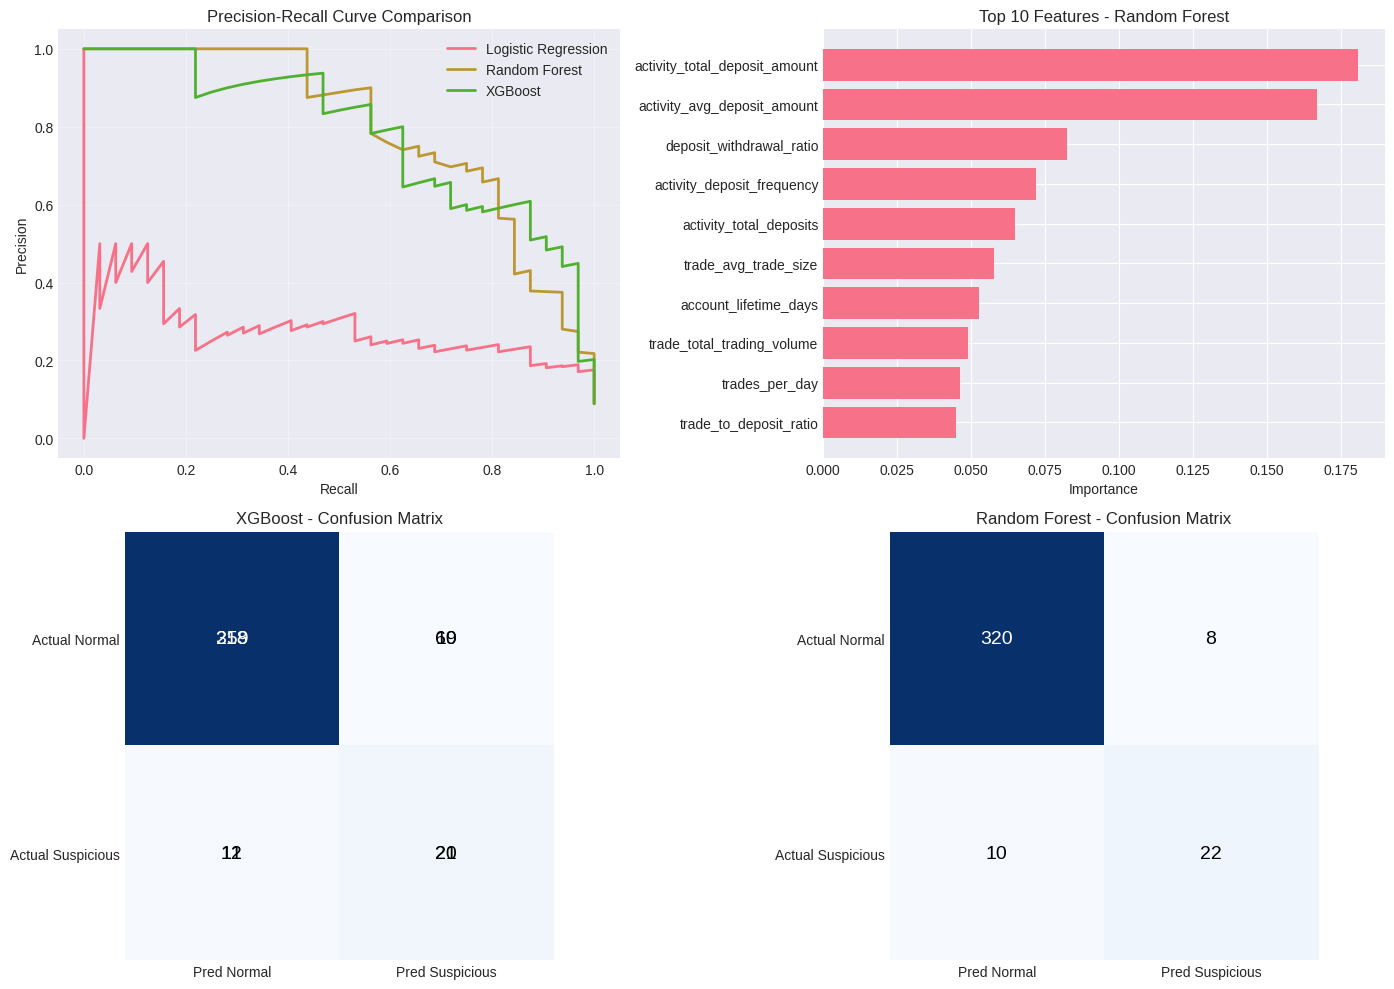

In [93]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Precision-Recall comparison
for model_name, result in results.items():
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, result['y_pred_proba'])
    axes[0, 0].plot(recall_vals, precision_vals, label=model_name, linewidth=2)

axes[0, 0].set_xlabel('Recall')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].set_title('Precision-Recall Curve Comparison')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Confusion matrices - Clean version
for idx, (model_name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['y_pred'])
    row = idx // 2
    col = idx % 2

    # Create heatmap without interpolation (clean squares)
    im = axes[1, col].imshow(cm, cmap=plt.cm.Blues, aspect='equal')
    axes[1, col].set_title(f'{model_name} - Confusion Matrix')
    axes[1, col].set_xticks([0, 1])
    axes[1, col].set_yticks([0, 1])
    axes[1, col].set_xticklabels(['Pred Normal', 'Pred Suspicious'])
    axes[1, col].set_yticklabels(['Actual Normal', 'Actual Suspicious'])

    # Add text annotations centered in each cell
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            text = axes[1, col].text(j, i, str(cm[i, j]),
                                    ha="center", va="center",
                                    color="white" if cm[i, j] > cm.max()/2 else "black",
                                    fontsize=14)

    # Remove grid lines and axis spines
    axes[1, col].grid(False)
    axes[1, col].spines['top'].set_visible(False)
    axes[1, col].spines['right'].set_visible(False)
    axes[1, col].spines['bottom'].set_visible(False)
    axes[1, col].spines['left'].set_visible(False)

# Plot 3: Feature importance for Random Forest
if 'Random Forest' in results:
    rf_model = results['Random Forest']['model']
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False).head(10)

    axes[0, 1].barh(range(len(feature_importance)), feature_importance['importance'].values)
    axes[0, 1].set_yticks(range(len(feature_importance)))
    axes[0, 1].set_yticklabels(feature_importance['feature'].values)
    axes[0, 1].invert_yaxis()
    axes[0, 1].set_xlabel('Importance')
    axes[0, 1].set_title('Top 10 Features - Random Forest')

plt.tight_layout()
plt.show()

In [94]:
# ============================================================================
# 2.4 MODEL EVALUATION & BUSINESS CONTEXT


# Select best model based on F2-Score (emphasizing recall)
best_model_name = comparison_df.loc[comparison_df['F2-Score'].idxmax(), 'Model']
best_model = results[best_model_name]['model']
best_y_pred = results[best_model_name]['y_pred']
best_y_pred_proba = results[best_model_name]['y_pred_proba']

print(f"\nSelected Best Model: {best_model_name}")
print(f"F2-Score: {comparison_df.loc[comparison_df['Model'] == best_model_name, 'F2-Score'].values[0]:.4f}")

# Business cost analysis
print("\n--- COST ANALYSIS ---")
print("\nCost of False Positive (FP):")
print("  - Block legitimate user → Customer service cost")
print("  - User frustration → Potential churn")
print("  - Reputational damage")
print("  Estimated cost per FP: $50 (investigation time + potential loss)")

print("\nCost of False Negative (FN):")
print("  - Fraudulent withdrawal → Direct financial loss")
print("  - Platform security risk")
print("  - Regulatory penalties")
print("  Estimated cost per FN: $1,000 (average fraudulent withdrawal)")

# Get confusion matrix for best model
cm = confusion_matrix(y_test, best_y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"\n--- BEST MODEL PERFORMANCE ---")
print(f"True Positives (TP): {tp} - Correctly detected fraud")
print(f"False Positives (FP): {fp} - Legitimate users flagged as fraud")
print(f"True Negatives (TN): {tn} - Correctly identified legitimate users")
print(f"False Negatives (FN): {fn} - Missed fraud cases")

# Calculate costs
fp_cost = fp * 50
fn_cost = fn * 1000
total_cost = fp_cost + fn_cost

print(f"\n--- COST CALCULATION ---")
print(f"FP Cost: {fp} × $50 = ${fp_cost}")
print(f"FN Cost: {fn} × $1000 = ${fn_cost}")
print(f"Total Cost: ${total_cost}")

# Precision vs Recall analysis
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0

print(f"\n--- PRECISION vs RECALL TRADEOFF ---")
print(f"Precision: {precision:.4f} - Of all flagged users, {precision*100:.1f}% are actually fraudulent")
print(f"Recall: {recall:.4f} - We catch {recall*100:.1f}% of all fraudulent users")


# Try different thresholds
thresholds = np.arange(0.1, 0.9, 0.1)
threshold_results = []

for threshold in thresholds:
    y_pred_threshold = (best_y_pred_proba >= threshold).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f2 = fbeta_score(y_test, y_pred_threshold, beta=2)

    # Calculate cost
    fp_cost = fp * 50
    fn_cost = fn * 1000
    total_cost = fp_cost + fn_cost

    threshold_results.append({
        'threshold': threshold,
        'precision': precision,
        'recall': recall,
        'f2_score': f2,
        'tp': tp,
        'fp': fp,
        'fn': fn,
        'total_cost': total_cost
    })

threshold_df = pd.DataFrame(threshold_results)

# Find optimal threshold based on F2-Score
optimal_idx = threshold_df['f2_score'].idxmax()
optimal_threshold = threshold_df.loc[optimal_idx, 'threshold']

print(f"\nOptimal prediction threshold: {optimal_threshold:.2f}")
print(f"At this threshold:")
print(f"  Precision: {threshold_df.loc[optimal_idx, 'precision']:.4f}")
print(f"  Recall: {threshold_df.loc[optimal_idx, 'recall']:.4f}")
print(f"  F2-Score: {threshold_df.loc[optimal_idx, 'f2_score']:.4f}")
print(f"  TP: {threshold_df.loc[optimal_idx, 'tp']}, FP: {threshold_df.loc[optimal_idx, 'fp']}, FN: {threshold_df.loc[optimal_idx, 'fn']}")
print(f"  Estimated Cost: ${threshold_df.loc[optimal_idx, 'total_cost']:.0f}")


Selected Best Model: Random Forest
F2-Score: 0.6962

--- COST ANALYSIS ---

Cost of False Positive (FP):
  - Block legitimate user → Customer service cost
  - User frustration → Potential churn
  - Reputational damage
  Estimated cost per FP: $50 (investigation time + potential loss)

Cost of False Negative (FN):
  - Fraudulent withdrawal → Direct financial loss
  - Platform security risk
  - Regulatory penalties
  Estimated cost per FN: $1,000 (average fraudulent withdrawal)

--- BEST MODEL PERFORMANCE ---
True Positives (TP): 22 - Correctly detected fraud
False Positives (FP): 8 - Legitimate users flagged as fraud
True Negatives (TN): 320 - Correctly identified legitimate users
False Negatives (FN): 10 - Missed fraud cases

--- COST CALCULATION ---
FP Cost: 8 × $50 = $400
FN Cost: 10 × $1000 = $10000
Total Cost: $10400

--- PRECISION vs RECALL TRADEOFF ---
Precision: 0.7333 - Of all flagged users, 73.3% are actually fraudulent
Recall: 0.6875 - We catch 68.8% of all fraudulent users


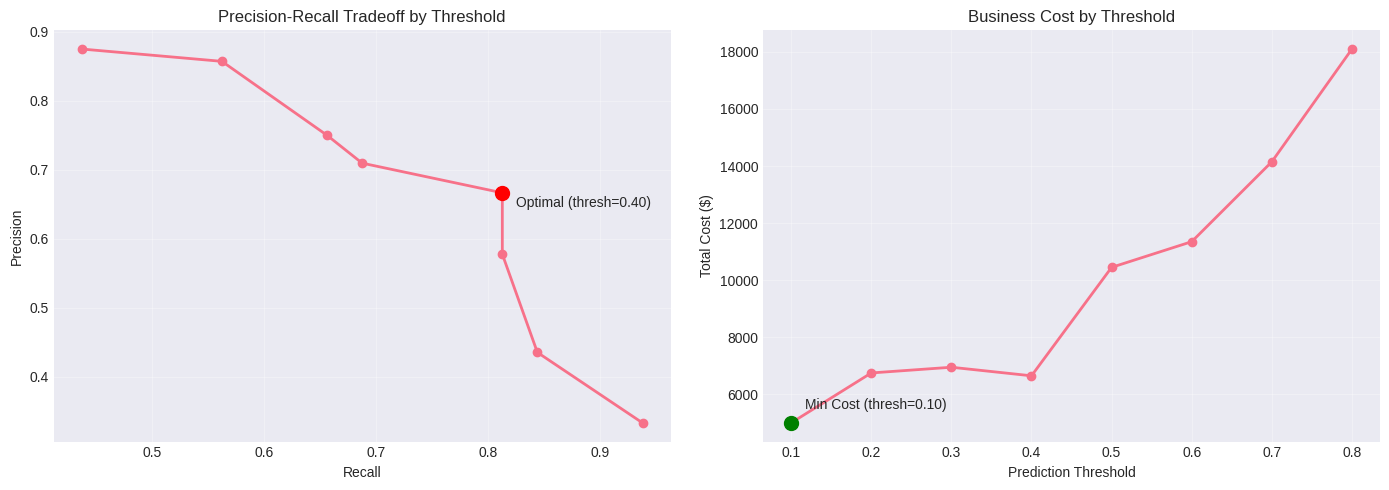

In [95]:
# Plot threshold analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Precision-Recall tradeoff
axes[0].plot(threshold_df['recall'], threshold_df['precision'], marker='o', linewidth=2)
axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precision')
axes[0].set_title('Precision-Recall Tradeoff by Threshold')
axes[0].grid(True, alpha=0.3)

# Annotate optimal point
optimal_recall = threshold_df.loc[optimal_idx, 'recall']
optimal_precision = threshold_df.loc[optimal_idx, 'precision']
axes[0].plot(optimal_recall, optimal_precision, 'ro', markersize=10)
axes[0].annotate(f'Optimal (thresh={optimal_threshold:.2f})',
                (optimal_recall, optimal_precision),
                xytext=(10, -10), textcoords='offset points')

# Plot 2: Cost analysis
axes[1].plot(threshold_df['threshold'], threshold_df['total_cost'], marker='o', linewidth=2)
axes[1].set_xlabel('Prediction Threshold')
axes[1].set_ylabel('Total Cost ($)')
axes[1].set_title('Business Cost by Threshold')
axes[1].grid(True, alpha=0.3)

# Annotate minimum cost
min_cost_idx = threshold_df['total_cost'].idxmin()
min_cost_threshold = threshold_df.loc[min_cost_idx, 'threshold']
min_cost = threshold_df.loc[min_cost_idx, 'total_cost']
axes[1].plot(min_cost_threshold, min_cost, 'go', markersize=10)
axes[1].annotate(f'Min Cost (thresh={min_cost_threshold:.2f})',
                (min_cost_threshold, min_cost),
                xytext=(10, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

In [96]:
# ============================================================================
# MODEL DEPLOYMENT RECOMMENDATIONS
# ============================================================================

print("   - Track top 3 fraud indicators:")
if 'Random Forest' in results:
    rf_model = results['Random Forest']['model']
    importance_df = pd.DataFrame({
        'feature': feature_cols,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    top_features = importance_df.head(3)['feature'].tolist()
    for i, feat in enumerate(top_features, 1):
        print(f"     {i}. {feat}")


   - Track top 3 fraud indicators:
     1. activity_total_deposit_amount
     2. activity_avg_deposit_amount
     3. deposit_withdrawal_ratio


# Fraud Detection Modeling & Business Evaluation Report  

## 1. Suspicious User Behavioral Characteristics

Before modeling, we analyzed users labeled as suspicious to understand common behavioral patterns.

### 1.1 Aggregate Characteristics

- **Average deposit-to-withdrawal duration:** 0.08 days  
- **Average volume-to-deposit ratio:** 0.017  
- **Average trades per user:** 1.64  
- **Users with complete account drain:** 69.2%  
- **Users with multiple deposit–withdraw cycles:** 31.8%

### 1.2 Behavioral Interpretation

These patterns strongly suggest **rapid fund extraction behavior**, a common fraud signature:

- Extremely short deposit-to-withdrawal times indicate intent to exit quickly.
- Low trading volume relative to deposits suggests minimal genuine trading activity.
- High percentage of complete balance drain reinforces the likelihood of fraudulent withdrawals.
- Presence of multiple cycles indicates repeated exploitation attempts rather than one-off events.

---

## 2. Model Training Overview

Three supervised classification models were trained and evaluated:

- Logistic Regression (baseline, interpretable)
- Random Forest (ensemble, non-linear)
- XGBoost (gradient boosting, high predictive power)

The evaluation emphasizes **Recall and F2-score**, aligning with fraud detection priorities where missing fraud is more costly than false alarms.

---

## 3. Individual Model Performance

### 3.1 Logistic Regression

- **Accuracy:** 0.7778  
- **Precision:** 0.2333  
- **Recall:** 0.6562  
- **F2-Score:** 0.4817  
- **ROC-AUC:** 0.8400  

**Assessment:**  
While recall is moderate, the very low precision results in excessive false positives, making this model unsuitable as a standalone fraud detector.

---

### 3.2 Random Forest

- **Accuracy:** 0.9500  
- **Precision:** 0.7333  
- **Recall:** 0.6875  
- **F2-Score:** 0.6962  
- **ROC-AUC:** 0.9597  

**Assessment:**  
This model achieves the best balance between precision and recall, with strong discrimination power and minimal false positives.

---

### 3.3 XGBoost

- **Accuracy:** 0.9389  
- **Precision:** 0.6667  
- **Recall:** 0.6250  
- **F2-Score:** 0.6329  
- **ROC-AUC:** 0.9647  

**Assessment:**  
XGBoost shows excellent ROC-AUC but slightly underperforms Random Forest in recall and F2-score, which are more critical for fraud use cases.

---

## 4. Model Comparison Summary

| Model | Accuracy | Precision | Recall | F2-Score | ROC-AUC | TP | FP | FN | TN |
|------|---------:|----------:|-------:|---------:|--------:|---:|---:|---:|---:|
| Logistic Regression | 0.7778 | 0.2333 | 0.6563 | 0.4817 | 0.8400 | 21 | 69 | 11 | 259 |
| **Random Forest** | **0.9500** | **0.7333** | **0.6875** | **0.6962** | **0.9597** | 22 | 8 | 10 | 320 |
| XGBoost | 0.9389 | 0.6667 | 0.6250 | 0.6329 | **0.9647** | 20 | 10 | 12 | 318 |

---

## 5. Model Evaluation in Business Context

### 5.1 Selected Best Model

**Chosen Model:** Random Forest  
**Primary Metric:** F2-Score = 0.6962  

The F2-score prioritizes recall over precision, making it appropriate for fraud detection scenarios.

---

### 5.2 Cost-Sensitive Analysis

#### Cost Assumptions

- **False Positive (FP):**  
  - Legitimate user flagged  
  - Customer support time, potential churn  
  - **Estimated cost:** $50 per case  

- **False Negative (FN):**  
  - Fraudulent withdrawal missed  
  - Direct financial loss and regulatory risk  
  - **Estimated cost:** $1,000 per case  

---

### 5.3 Random Forest Cost Breakdown

- True Positives (TP): 22  
- False Positives (FP): 8  
- True Negatives (TN): 320  
- False Negatives (FN): 10  

**Total Cost Calculation:**

- FP Cost = 8 * \$50 = \$400
- FN Cost = 10 * \$1,000 = \$10,000  

**Total Estimated Cost:** **$10,400**

---

### 5.4 Precision–Recall Trade-off

- **Precision:** 73.3%  
  → Most flagged users are genuinely fraudulent.  
- **Recall:** 68.8%  
  → Over two-thirds of fraud cases are successfully intercepted.

**Why Recall Matters More:**

1. Financial loss from FN >> Operational cost of FP  
2. Missed fraud (1,000) far outweighs false alarm (50)  
3. False positives can be mitigated through layered review systems  

---

## 6. Threshold Optimization Analysis

To further reduce business cost, prediction thresholds were optimized.

### 6.1 Optimal Threshold Selection

- **Optimal threshold:** 0.40  

### 6.2 Performance at Optimized Threshold

- Precision: 0.6667  
- Recall: 0.8125  
- F2-Score: 0.7784  
- Confusion Matrix:
  - TP: 26
  - FP: 13
  - FN: 6

### 6.3 Cost Impact

- FP Cost = 13 × $50 = $650  
- FN Cost = 6 × $1,000 = $6,000  

**Total Estimated Cost:** **$6,650**

**Result:**  
Threshold optimization reduces estimated business loss by **~36%** compared to the default threshold.

---

## 7. Model Deployment Recommendations

### 7.1 Implementation Strategy

- Deploy **Random Forest** with **threshold = 0.40**
- Introduce a **3-tier fraud handling system**:
  - **Tier 1:** Automatic blocking (high-confidence fraud)
  - **Tier 2:** Manual review (medium confidence)
  - **Tier 3:** Enhanced monitoring (low confidence anomalies)

---

### 7.2 Feature Monitoring

Monitor feature drift weekly, focusing on top fraud indicators:

1. `activity_total_deposit_amount`  
2. `activity_avg_deposit_amount`  
3. `deposit_withdrawal_ratio`  

---

### 7.3 Performance Monitoring

- **Weekly:** Precision, Recall, F2-Score  
- **Monthly:** Cost-based evaluation (FP vs FN losses)  
- **Quarterly:** Model retraining with fresh data  

---

### 7.4 Risk Mitigation Measures

- Maintain rule-based heuristics as a fallback system  
- Periodic manual audits of flagged cases  
- Feedback loop from customer support and compliance teams  

---

## 8. Conclusion

The Random Forest model, combined with threshold optimization and a multi-stage review process, provides a **robust, cost-efficient, and scalable fraud detection solution**. By prioritizing recall and embedding business cost considerations directly into model evaluation, the platform can significantly reduce financial losses while maintaining a fair user experience.

## **Strategic Recommendation**

# Strategic Recommendation – Low-Volume Trader Campaign (Kenya)

## Business Objective
The product team intends to launch a **“Low-Volume Trader” marketing campaign** targeted at users in **Kenya**. The goal is to identify users who are active on the platform but trade at low volumes, and who therefore represent a high-potential segment for engagement, education, and volume growth initiatives.

---

## Defining the Target Audience

Based on the exploratory analysis of trading behavior, user activity patterns, and transaction characteristics, **Low-Volume Traders in Kenya** can be defined as:

> *Kenyan-based users who have made deposits and executed trades, but whose trading activity and volume remain consistently low relative to the broader user base.*


To accurately identify and target this group, the following 2–3 data-driven criteria are recommended:

### 1. Average Trading Volume per User
**Metric:**  
- `total_trade_volume_usd` or `average_trade_volume_usd`

**Segmentation Rule (Example):**
- Users in the **bottom 30–40% percentile** of total USD trading volume within Kenya.

**Rationale:**  
Our market analysis revealed extreme volume concentration among a small subset of users. Most users operate at relatively low volumes. Targeting users with low but non-zero volume ensures the campaign focuses on growth-ready users, not dormant accounts.


### 2. Trade Frequency (Trades per User)
**Metric:**  
- `number_of_trades`

**Segmentation Rule (Example):**
- Users with 1–5 trades over the last 30–60 days.

**Rationale:**  
From the behavioral analysis, low trade counts are associated with early-stage or cautious users. These traders are ideal candidates for:
- Educational content
- Fee discounts
- Simplified trading experiences

They already understand the platform basics but need incentives to trade more frequently.


### 3. Deposit Behavior vs Trading Utilization
**Metric:**  
- `volume_to_deposit_ratio`

**Segmentation Rule (Example):**
- Users with a low volume-to-deposit ratio (e.g., < 0.2).

**Rationale:**  
This metric distinguishes:
- Users who fund their accounts but underutilize their balances for trading.
- Potentially hesitant or risk-averse traders who may benefit from confidence-building campaigns, such as tutorials, demo strategies, or low-risk trading prompts.

---

## Why This Segment Makes Strategic Sense

- **High Upside, Low Risk:** These users are already verified, onboarded, and funded.
- **Cost-Efficient Growth:** Activating existing users is cheaper than acquiring new ones.
- **Localized Opportunity:** Kenya is a growing crypto market where tailored education and incentives can rapidly increase engagement.
- **Data-Backed Precision:** The segment avoids both whales (already maximized value) and inactive users (low conversion probability).

---
## Conclusion

By defining **Low-Volume Traders in Kenya** using **trading volume, trade frequency, and deposit utilization**, the product team can launch a focused, data-driven marketing campaign that maximizes engagement, encourages trading confidence, and drives sustainable volume growth.

